<a href="https://www.kaggle.com/code/soumodeep12002740/customer-segmentation?scriptVersionId=149338206" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customers-data/customers-data - customers-data.csv
/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv


In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv")

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [6]:
df.fillna(df.mean(), inplace=True)


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


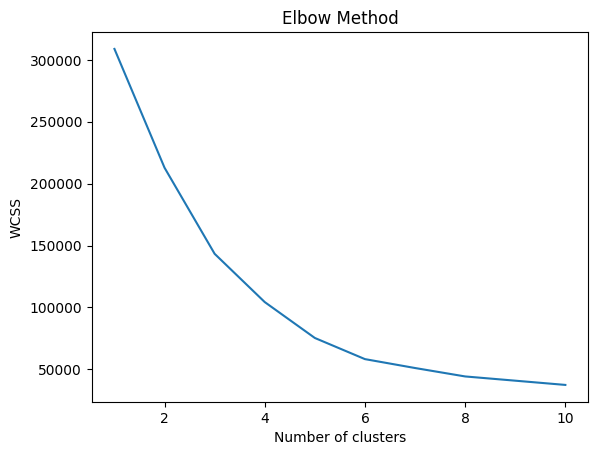

In [7]:
#elbow method
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=400, n_init=10, random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# K_Means


In [8]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=400, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(df)

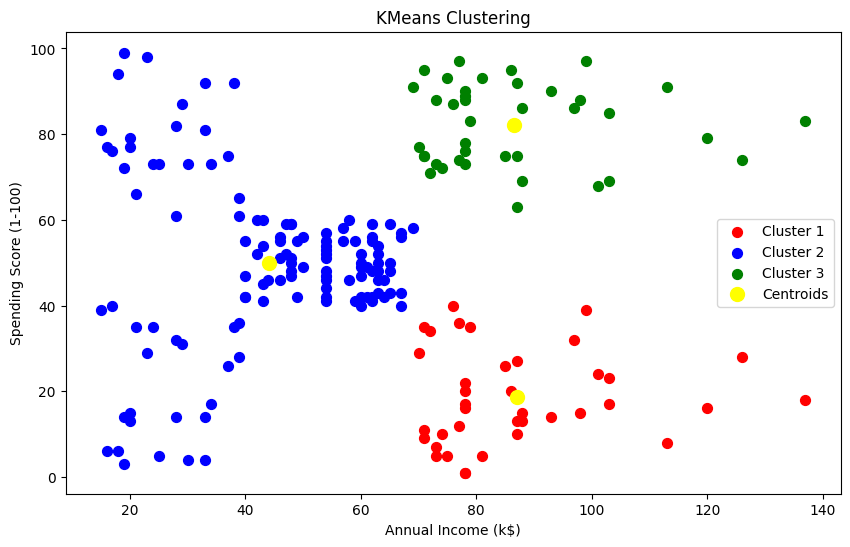

In [9]:
df['Cluster'] = y_kmeans

plt.figure(figsize=(10, 6))

# Scatter plot for 'Annual Income' and 'Spending Score'
plt.scatter(df[df['Cluster'] == 0]['Annual Income (k$)'], df[df['Cluster'] == 0]['Spending Score (1-100)'], s=50, c='red', label='Cluster 1')
plt.scatter(df[df['Cluster'] == 1]['Annual Income (k$)'], df[df['Cluster'] == 1]['Spending Score (1-100)'], s=50, c='blue', label='Cluster 2')
plt.scatter(df[df['Cluster'] == 2]['Annual Income (k$)'], df[df['Cluster'] == 2]['Spending Score (1-100)'], s=50, c='green', label='Cluster 3')

# centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=100, c='yellow', label='Centroids')

plt.title('KMeans Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# Hierarchical Clustering

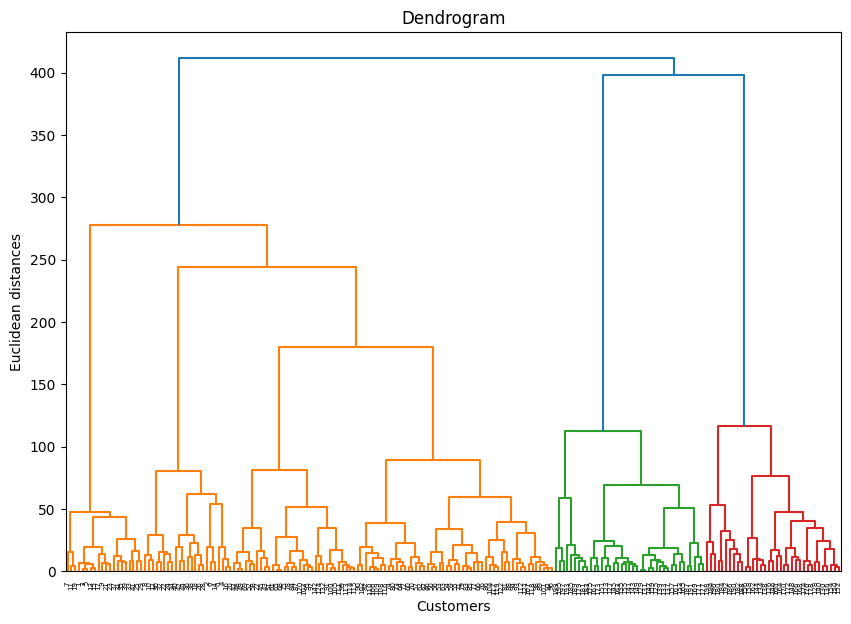

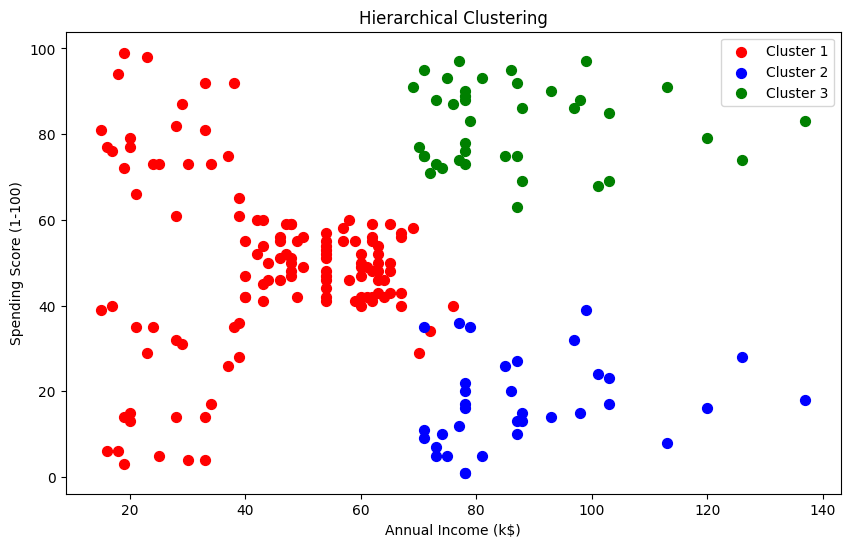

In [10]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Generate the linkage matrix
Z = linkage(df, 'ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

# Fit the Agglomerative Clustering model
hc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(df)

# Add the cluster labels to your original DataFrame
df['HCluster'] = y_hc

# Visualizing the clusters
plt.figure(figsize=(10, 6))

# Scatter plot for 'Annual Income' and 'Spending Score'
plt.scatter(df[df['HCluster'] == 0]['Annual Income (k$)'], df[df['HCluster'] == 0]['Spending Score (1-100)'], s=50, c='red', label='Cluster 1')
plt.scatter(df[df['HCluster'] == 1]['Annual Income (k$)'], df[df['HCluster'] == 1]['Spending Score (1-100)'], s=50, c='blue', label='Cluster 2')
plt.scatter(df[df['HCluster'] == 2]['Annual Income (k$)'], df[df['HCluster'] == 2]['Spending Score (1-100)'], s=50, c='green', label='Cluster 3')

plt.title('Hierarchical Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


# Silhouette Score & Davies-Bouldin Score

In [11]:
from sklearn import metrics

# Silhouette Score
silhouette_kmeans = metrics.silhouette_score(df, y_kmeans)
silhouette_hc = metrics.silhouette_score(df, y_hc)

# Davies-Bouldin Score
db_kmeans = metrics.davies_bouldin_score(df, y_kmeans)
db_hc = metrics.davies_bouldin_score(df, y_hc)

data = {
    'Clustering Algorithm': ['KMeans', 'Hierarchical'],
    'Silhouette Score': [silhouette_kmeans, silhouette_hc],
    'Davies-Bouldin Score': [db_kmeans, db_hc]
}

df_scores = pd.DataFrame(data)


print(df_scores)

  Clustering Algorithm  Silhouette Score  Davies-Bouldin Score
0               KMeans          0.384360              0.874391
1         Hierarchical          0.381853              0.859871
